In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/la-crime-data-2010-to-2023/mo_codes.csv
/kaggle/input/la-crime-data-2010-to-2023/la_crime_2010_to_2023.csv


In [ ]:
df = pd.read_csv('/kaggle/input/la-crime-data-2010-to-2023/la_crime_2010_to_2023.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993433 entries, 0 to 2993432
Data columns (total 29 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            float64
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
 28  AREA        

In [ ]:
df.describe(include='all')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
count,2.993433e+06,2993433,2993433,2.993433e+06,2.135775e+06,2993433,2.993433e+06,2.993433e+06,2.993433e+06,2993433,...,2993433,2.993412e+06,205889.000000,5820.000000,170.000000,2993433,494408,2.993433e+06,2.993433e+06,857658.000000
unique,NaN,5093,5093,NaN,NaN,21,NaN,NaN,NaN,143,...,6,NaN,NaN,NaN,NaN,83225,15326,NaN,NaN,NaN
top,NaN,11/01/2021 12:00:00 AM,01/01/2010 12:00:00 AM,NaN,NaN,77th Street,NaN,NaN,NaN,BATTERY - SIMPLE ASSAULT,...,Invest Cont,NaN,NaN,NaN,NaN,6TH ST,BROADWAY,NaN,NaN,NaN
freq,NaN,963,2347,NaN,NaN,199626,NaN,NaN,NaN,259215,...,2324363,NaN,NaN,NaN,NaN,6194,8426,NaN,NaN,NaN
mean,1.691583e+08,NaN,NaN,1.352589e+03,1.112354e+01,NaN,1.146872e+03,1.435812e+00,5.053445e+02,NaN,...,NaN,5.051395e+02,951.684369,976.656701,982.252941,NaN,NaN,3.403801e+01,-1.182204e+02,10.707830
std,4.032512e+07,NaN,NaN,6.491117e+02,6.008723e+00,NaN,6.037440e+02,4.958629e-01,2.098587e+02,NaN,...,NaN,2.096967e+02,121.240871,74.411957,65.399189,NaN,NaN,1.167065e+00,4.035167e+00,6.097109
min,8.170000e+02,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+02,1.000000e+00,1.100000e+02,NaN,...,NaN,1.100000e+02,210.000000,93.000000,421.000000,NaN,NaN,0.000000e+00,-1.188279e+02,1.000000
25%,1.317126e+08,NaN,NaN,9.160000e+02,6.000000e+00,NaN,6.380000e+02,1.000000e+00,3.300000e+02,NaN,...,NaN,3.300000e+02,998.000000,998.000000,998.000000,NaN,NaN,3.401110e+01,-1.184348e+02,6.000000
50%,1.711210e+08,NaN,NaN,1.430000e+03,1.200000e+01,NaN,1.177000e+03,1.000000e+00,4.420000e+02,NaN,...,NaN,4.420000e+02,998.000000,998.000000,998.000000,NaN,NaN,3.406170e+01,-1.183279e+02,11.000000
75%,2.020057e+08,NaN,NaN,1.900000e+03,1.600000e+01,NaN,1.659000e+03,2.000000e+00,6.260000e+02,NaN,...,NaN,6.260000e+02,998.000000,998.000000,998.000000,NaN,NaN,3.417230e+01,-1.182767e+02,16.000000


In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN


In [ ]:
df[df.isnull().any(axis=1)].head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN


In [ ]:
df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA               857658
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            352115
Vict Age                0
Vict Sex           314958
Vict Descent       315011
Premis Cd              57
Premis Desc           717
Weapon Used Cd    1978414
Weapon Desc       1978415
Status                  3
Status Desc             0
Crm Cd 1               21
Crm Cd 2          2787544
Crm Cd 3          2987613
Crm Cd 4          2993263
LOCATION                0
Cross Street      2499025
LAT                     0
LON                     0
AREA              2135775
dtype: int64

In [ ]:
df2 = df.drop(columns=['AREA']).dropna(subset=['Vict Sex'])

In [ ]:
df2= df2[df2['Vict Sex'].isin(['M','F','X'])]

Text(0.5, 1.0, 'Distribution of Victim Sex')

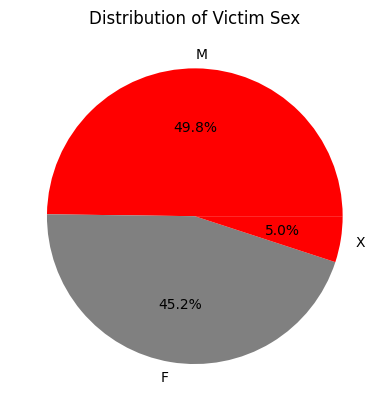

In [ ]:
df2['Vict Sex'].value_counts().plot.pie(autopct='%.1f%%', colors =['red','grey','red'])
plt.ylabel('')
plt.title('Distribution of Victim Sex')

In [ ]:
df2['Vict Sex'].value_counts()

Vict Sex
M    1333623
F    1210023
X     134638
Name: count, dtype: int64

In [ ]:
grouped = df2.groupby(['AREA NAME','Vict Sex'])['Vict Sex'].agg('count')
max_count_index = grouped.groupby('AREA NAME').idxmax()
grouped.loc[max_count_index]

AREA NAME    Vict Sex
77th Street  F           95738
Central      M           85082
Devonshire   M           59862
Foothill     M           52726
Harbor       M           51555
Hollenbeck   M           44727
Hollywood    M           70212
Mission      M           60314
N Hollywood  M           80771
Newton       M           62961
Northeast    M           62237
Olympic      M           58717
Pacific      M           74382
Rampart      M           56496
Southeast    F           75818
Southwest    F           83686
Topanga      M           69177
Van Nuys     M           61879
West LA      M           58080
West Valley  M           64102
Wilshire     M           60881
Name: Vict Sex, dtype: int64

In [ ]:
grouped.loc[max_count_index].reset_index(name='count')

,AREA NAME,Vict Sex,count
0,77th Street,F,95738
1,Central,M,85082
2,Devonshire,M,59862
3,Foothill,M,52726
4,Harbor,M,51555
5,Hollenbeck,M,44727
6,Hollywood,M,70212
7,Mission,M,60314
8,N Hollywood,M,80771
9,Newton,M,62961


Text(0.5, 1.0, 'Maximum Victim Sex count in each area')

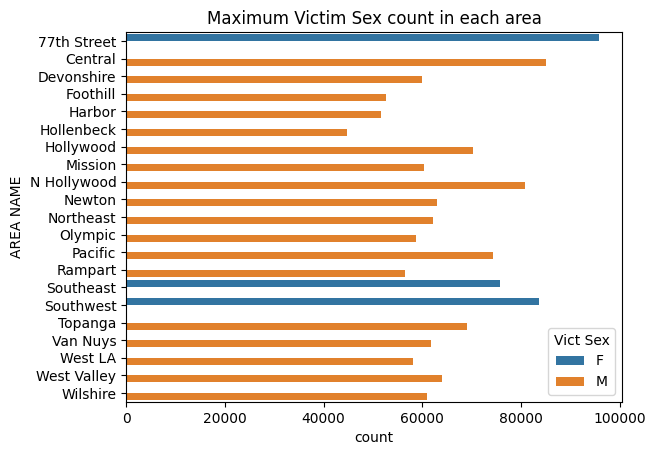

In [ ]:
x=grouped.loc[max_count_index].reset_index(name='count')
sns.barplot(y='AREA NAME',x='count',hue='Vict Sex',data=x, orient='h')
plt.title('Maximum Victim Sex count in each area')